<a href="https://colab.research.google.com/github/Shashank-177/Shashank/blob/main/Galaxies_SFR_determination.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

XTENSION= 'BINTABLE'           / binary table extension                         BITPIX  =                    8 / array data type                                NAXIS   =                    2 / number of array dimensions                     NAXIS1  =                   32 / length of dimension 1                          NAXIS2  =                 3822 / length of dimension 2                          PCOUNT  =                    0 / number of group parameters                     GCOUNT  =                    1 / number of groups                               TFIELDS =                    8 / number of table fields                         TTYPE1  = 'flux    '                                                            TFORM1  = 'E       '                                                            TTYPE2  = 'loglam  '                                                            TFORM2  = 'E       '                                                            TTYPE3  = 'ivar    '                    

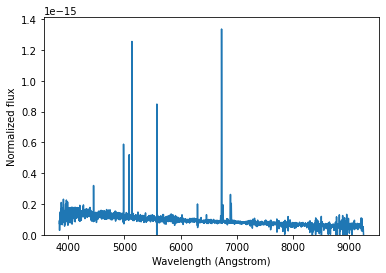

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits


#A
A = fits.open('Galaxy-A.fits')
data = A[1].data
# for i, hdu in enumerate(A):
#     print(f'HDU {i}:\n{hdu.header}\n{hdu.data}\n')


h1 = A[1].header
print(h1)

flux = A[1].data['flux']
wavelength = A[1].data['loglam']
# w = WCS(h1, naxis=1, relax=False, fix=False)
#lam = w.wcs_pix2world(np.arange(len(flux)), 0)[0]
lam = 10**(wavelength)
l1 = lam - (6729-6564.61)
print(l1)
Flux = flux*10**-17
plt.plot(lam, Flux)
plt.ylim(0, )
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Normalized flux')
plt.show()

A.close()

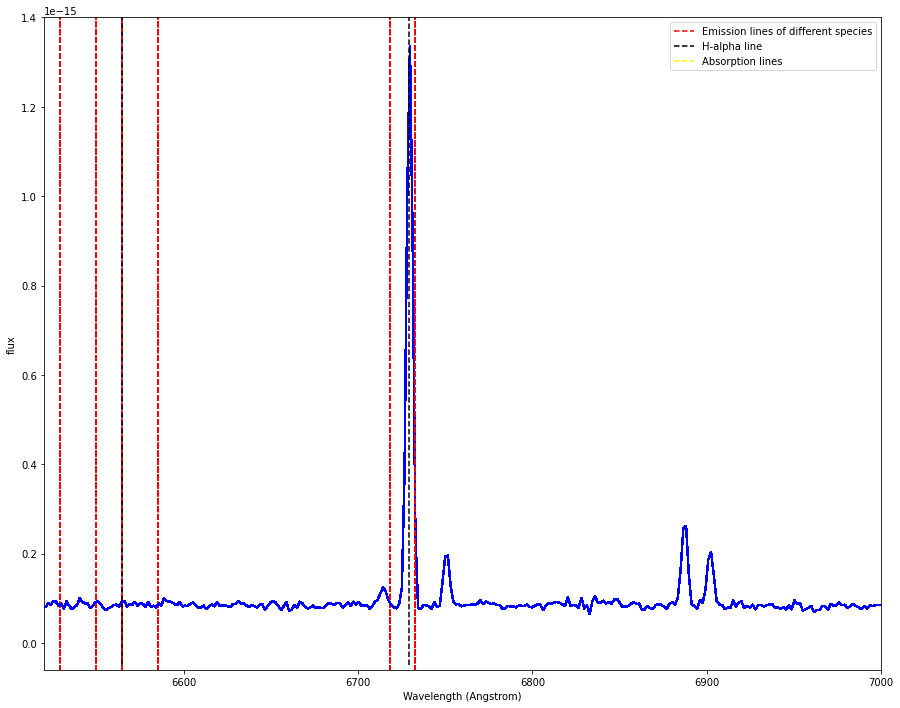

In [ ]:
import pandas as pd

Emi = pd.read_csv('Emissionlines.csv')
lam1 = Emi['Column1']
species = Emi['Column4']
#print(species)

Abs = pd.read_csv('Absorptionlines.csv')
lam2 = Abs['vac']
species2 = Abs['SPECIES']
Sky = pd.read_csv('Sky lines.csv')
lam3 = Sky['vac']
species3 = Sky['SPECIES']
plt.figure(figsize=(15,12))
for i in lam1:
  for t in lam2:

    plt.plot(lam, Flux,color ='blue')
    plt.vlines(i,-8*10**-17,15*10**-16,linestyle = '--',color ='red')
    y=plt.vlines(i,-8*10**-17,15*10**-16,linestyle = '--',color ='red')
    a=plt.vlines(t,-8*10**-17,15*10**-16,linestyle = '--',color = 'yellow')
    plt.ylim(-6*10**-17,14*10**-16)
    plt.xlim(6520,7000)
    plt.xlabel('Wavelength (Angstrom)')
    plt.ylabel('flux')
x=plt.vlines(6564.61,-5*10**-17,15*10**-16,linestyle='--',color='black',label = 'H-alpha line')
plt.vlines(6729,-5*10**-17,15*10**-16,linestyle='--',color='black')
plt.legend(handles=[y,x,a],labels = ['Emission lines of different species','H-alpha line','Absorption lines'])

plt.show()



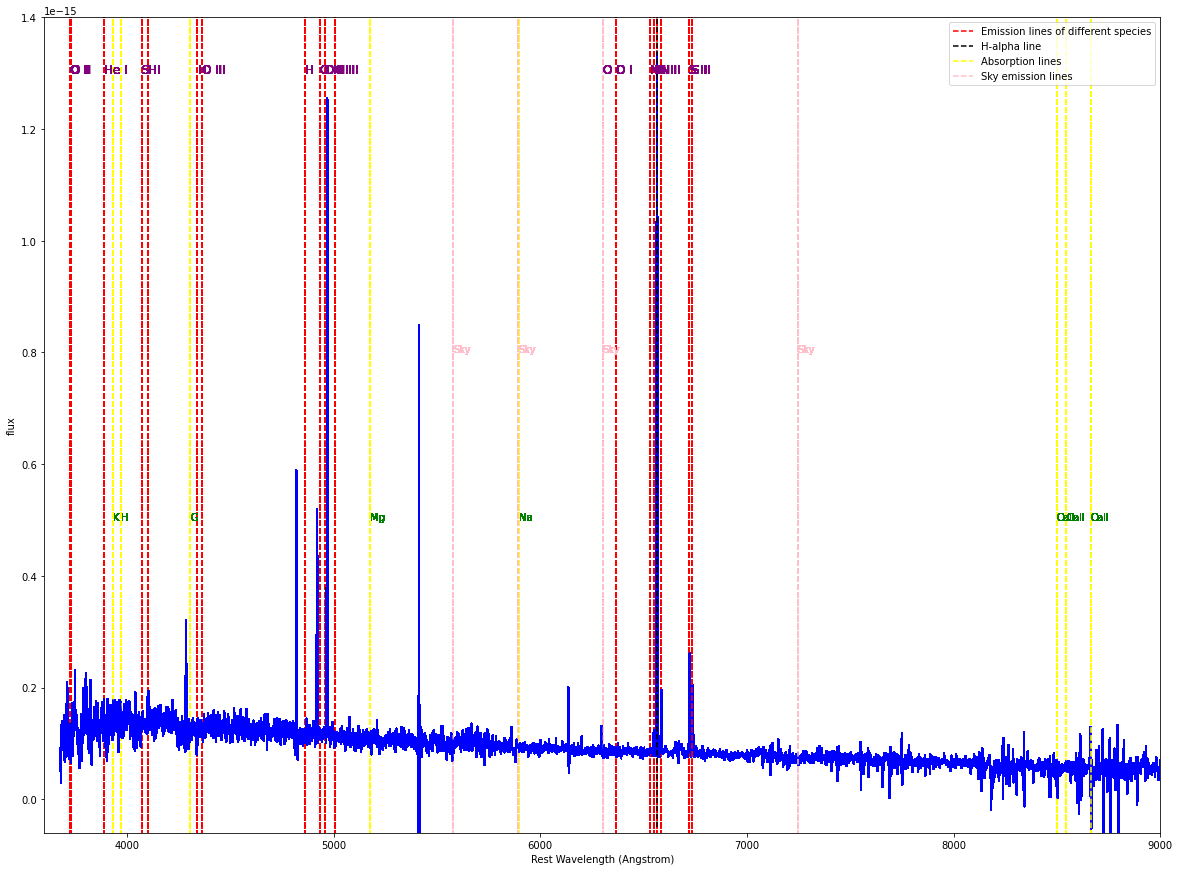

In [ ]:
l1 = lam - (6729-6564.61)
plt.figure(figsize=(20,15))
for i in range(len(lam1)):
  for t in range(len(lam2)):
    for s in range(len(lam3)):

      plt.plot(l1, Flux,color ='blue')
      #plt.vlines(lam1[i],-8*10**-17,15*10**-16,linestyle = '--',color ='black')
      y=plt.vlines(lam1[i],-8*10**-17,15*10**-16,linestyle = '--',color ='red')
      a=plt.vlines(lam2[t],-8*10**-17,15*10**-16,linestyle = '--',color = 'yellow')
      k=plt.vlines(lam3[s],-8*10**-17,15*10**-16,linestyle = '--',color = 'pink')

      plt.xlim(3600,9000)
      text =plt.text(lam1[i],13*10**-16,species[i],color='purple',fontsize = '12')
      if text.get_position()[0] < 3600 :
        text.set_visible(False)
      text1 = plt.text(lam2[t],5*10**-16,species2[t],color='green')
      if text1.get_position()[0] < 3600 :
        text.set_visible(False)
      text2 = plt.text(lam3[s],8*10**-16,species3[s],color ='pink')
      if text2.get_position()[0] < 3600 :
        text.set_visible(False)
      plt.ylim(-6*10**-17,14*10**-16)

      plt.xlabel('Rest Wavelength (Angstrom)')
      plt.ylabel('flux')

x=plt.vlines(6564.61,-5*10**-17,15*10**-16,linestyle='--',color='black',label = 'H-alpha line')
#plt.vlines(6729,-5*10**-17,15*10**-16,linestyle='--',color='black')

plt.legend(handles=[y,x,a,k],labels = ['Emission lines of different species','H-alpha line','Absorption lines','Sky emission lines'])
plt.show()

In [ ]:
def redshift(lr,lo):
  return (lo-lr)/lr

z = redshift(6564.61,6729)
print(z)

0.02504185320986324


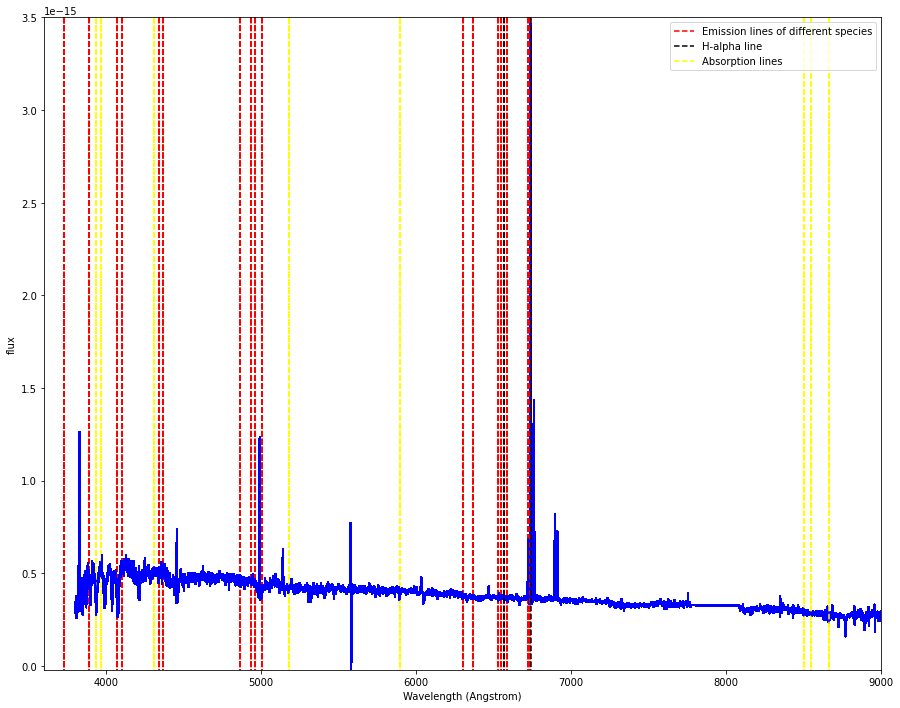

0.026382374581277564


In [ ]:
A = fits.open('Galaxy-B.fits')
data = A[1].data

flux = A[1].data['flux']
wavelength = A[1].data['loglam']
# w = WCS(h1, naxis=1, relax=False, fix=False)
#lam = w.wcs_pix2world(np.arange(len(flux)), 0)[0]
lam = 10**(wavelength)
Flux = flux*10**-17
plt.figure(figsize=(15,12))
for i in lam1:
  for t in lam2:

    plt.plot(lam, Flux,color ='blue')
    y=plt.vlines(i,-5*10**-17,38*10**-16,linestyle = '--',color ='red')
    a=plt.vlines(t,-5*10**-17,38*10**-16,linestyle = '--',color ='yellow')
    plt.ylim(-2*10**-17,35*10**-16)
    plt.xlim(3600,9000)
    plt.xlabel('Wavelength (Angstrom)')
    plt.ylabel('flux')

x=plt.vlines(6564.61,-5*10**-17,38*10**-16,linestyle='--',color='black',label = 'H-alpha line')
plt.legend(handles=[y,x,a],labels = ['Emission lines of different species','H-alpha line','Absorption lines'])
plt.vlines(6737.8,-5*10**-17,38*10**-16,linestyle='--',color='black')
#plt.vlines(6723,-5*10**-17,38*10**-16,linestyle='--',color='black')
plt.show()

z1=redshift(6564.61,6737.8)
print(z1)

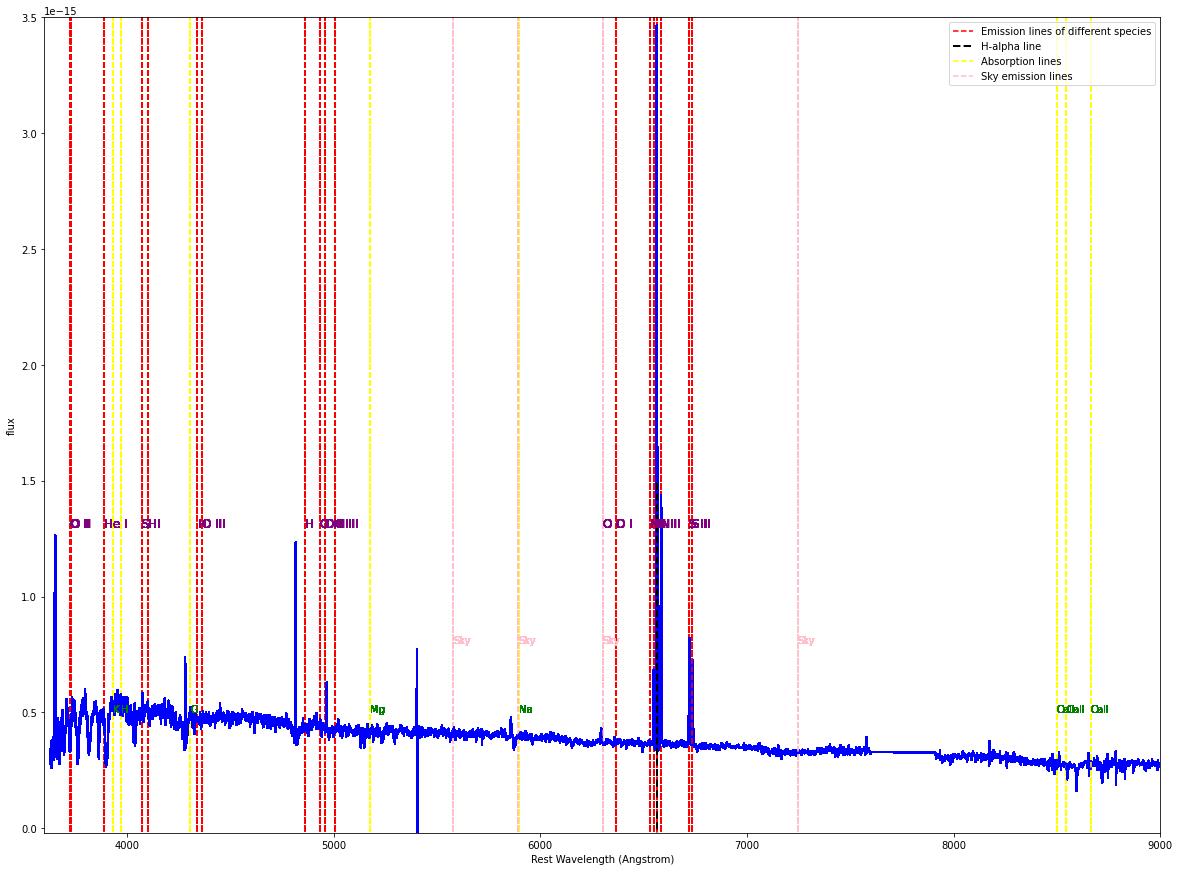

In [ ]:
l2 = lam - (6737.8-6564.1)
plt.figure(figsize=(20,15))
for i in range(len(lam1)):
  for t in range(len(lam2)):
    for s in range(len(lam3)):

      plt.plot(l2, Flux,color ='blue')
      #plt.vlines(lam1[i],-8*10**-17,15*10**-16,linestyle = '--',color ='black')
      y=plt.vlines(lam1[i],-8*10**-17,38*10**-16,linestyle = '--',color ='red')
      a=plt.vlines(lam2[t],-8*10**-17,38*10**-16,linestyle = '--',color = 'yellow')
      k=plt.vlines(lam3[s],-8*10**-17,38*10**-16,linestyle = '--',color = 'pink')

      plt.xlim(3600,9000)
      text =plt.text(lam1[i],13*10**-16,species[i],color='purple',fontsize = '12')
      if text.get_position()[0] < 3600 :
        text.set_visible(False)
      text1 = plt.text(lam2[t],5*10**-16,species2[t],color='green')
      if text1.get_position()[0] < 3600 :
        text.set_visible(False)
      text2 = plt.text(lam3[s],8*10**-16,species3[s],color ='pink')
      if text2.get_position()[0] < 3600 :
        text.set_visible(False)
      plt.ylim(-2*10**-17,35*10**-16)

      plt.xlabel('Rest Wavelength (Angstrom)')
      plt.ylabel('flux')

x=plt.vlines(6564.61,-5*10**-17,15*10**-16,linestyle='--',color='black',label = 'H-alpha line',linewidth = 2)
#plt.vlines(6729,-5*10**-17,15*10**-16,linestyle='--',color='black')

plt.legend(handles=[y,x,a,k],labels = ['Emission lines of different species','H-alpha line','Absorption lines','Sky emission lines'])
plt.show()

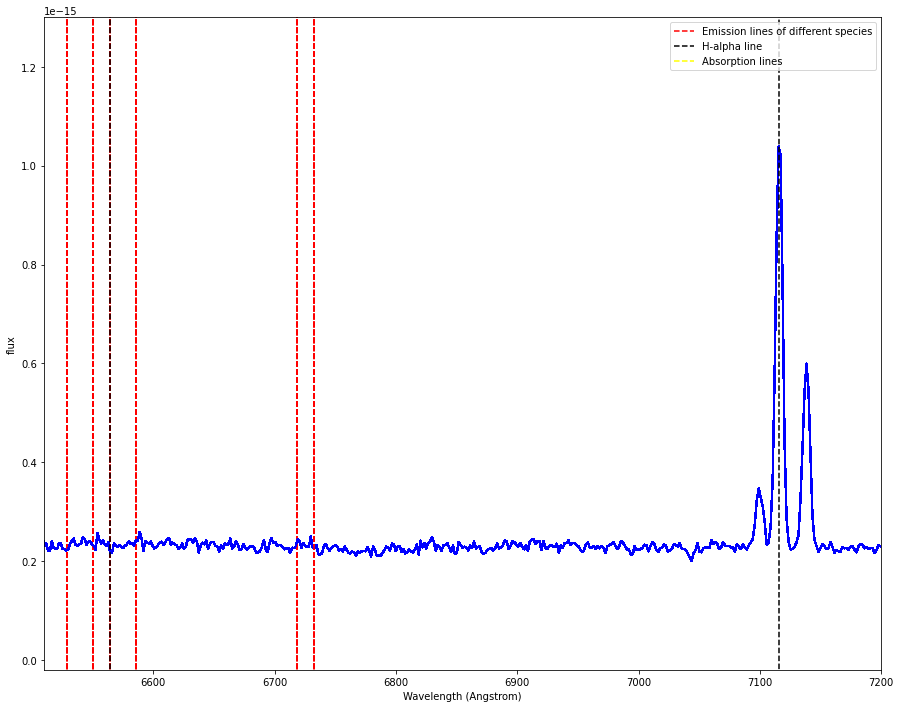

0.08399432715728739


In [ ]:
A = fits.open('Galaxy-C.fits')
data = A[1].data

flux = A[1].data['flux']
wavelength = A[1].data['loglam']
# w = WCS(h1, naxis=1, relax=False, fix=False)
#lam = w.wcs_pix2world(np.arange(len(flux)), 0)[0]
lam = 10**(wavelength)
Flux = flux*10**-17
plt.figure(figsize=(15,12))
for i in lam1:
  for t in lam2:

    plt.plot(lam, Flux,color ='blue')
    y=plt.vlines(i,-5*10**-17,38*10**-16,linestyle = '--',color ='red')
    a=plt.vlines(t,-5*10**-17,38*10**-16,linestyle = '--',color ='yellow')

    plt.ylim(-2*10**-17,13*10**-16)
    plt.xlim(6510,7200)
    plt.xlabel('Wavelength (Angstrom)')
    plt.ylabel('flux')

x=plt.vlines(6564.61,-5*10**-17,38*10**-16,linestyle='--',color='black',label = 'H-alpha line')
plt.legend(handles=[y,x,a],labels = ['Emission lines of different species','H-alpha line','Absorption lines'])
plt.vlines(7116,-5*10**-17,38*10**-16,linestyle='--',color='black')
#plt.vlines(6723,-5*10**-17,38*10**-16,linestyle='--',color='black')
plt.show()

z2=redshift(6564.61,7116)
print(z2)

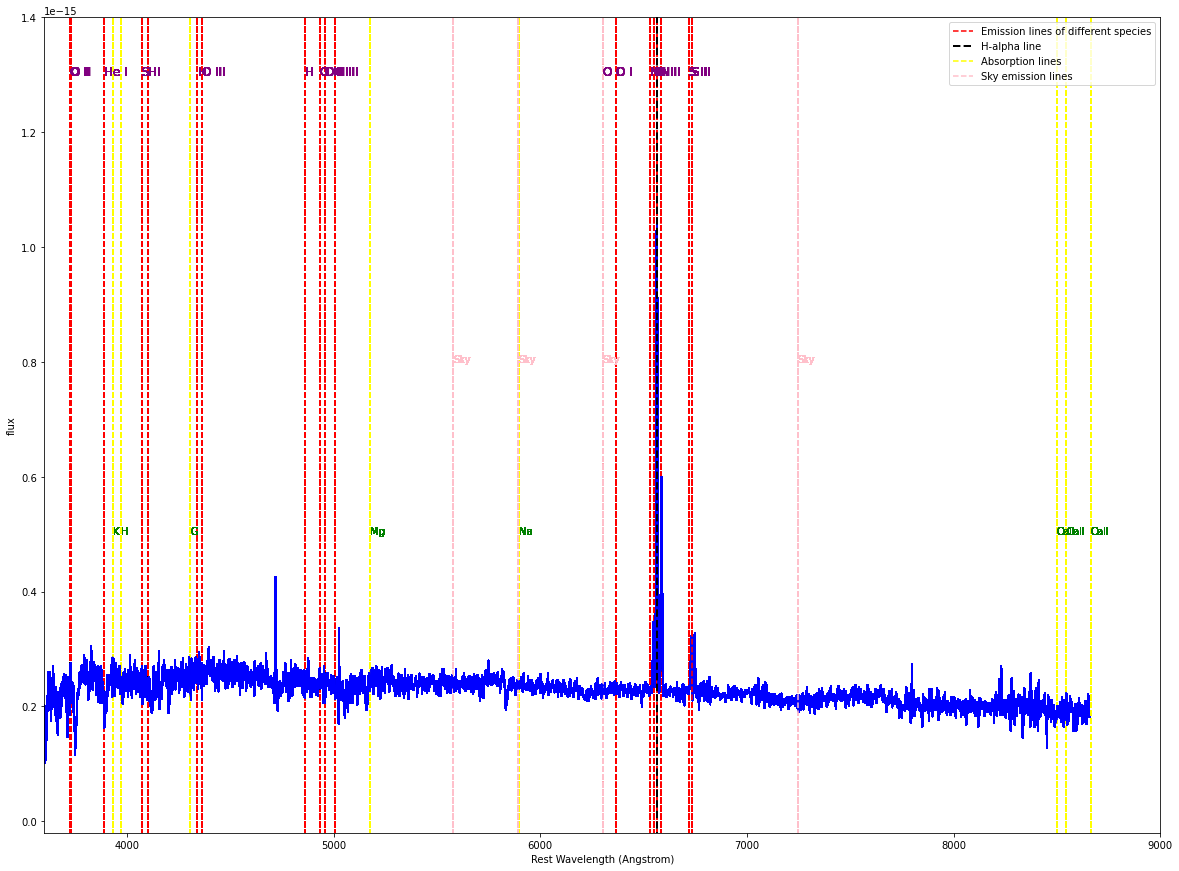

In [ ]:
l3 = lam - (7116-6564.61)
plt.figure(figsize=(20,15))
for i in range(len(lam1)):
  for t in range(len(lam2)):
    for s in range(len(lam3)):

      plt.plot(l3, Flux,color ='blue')
      #plt.vlines(lam1[i],-8*10**-17,15*10**-16,linestyle = '--',color ='black')
      y=plt.vlines(lam1[i],-8*10**-17,38*10**-16,linestyle = '--',color ='red')
      a=plt.vlines(lam2[t],-8*10**-17,38*10**-16,linestyle = '--',color = 'yellow')
      k=plt.vlines(lam3[s],-8*10**-17,38*10**-16,linestyle = '--',color = 'pink')

      plt.xlim(3600,9000)
      text =plt.text(lam1[i],13*10**-16,species[i],color='purple',fontsize = '12')
      if text.get_position()[0] < 3600 :
        text.set_visible(False)
      text1 = plt.text(lam2[t],5*10**-16,species2[t],color='green')
      if text1.get_position()[0] < 3600 :
        text.set_visible(False)
      text2 = plt.text(lam3[s],8*10**-16,species3[s],color ='pink')
      if text2.get_position()[0] < 3600 :
        text.set_visible(False)
      plt.ylim(-2*10**-17,14*10**-16)

      plt.xlabel('Rest Wavelength (Angstrom)')
      plt.ylabel('flux')

x=plt.vlines(6564.61,-5*10**-17,15*10**-16,linestyle='--',color='black',label = 'H-alpha line',linewidth = 2)
#plt.vlines(6729,-5*10**-17,15*10**-16,linestyle='--',color='black')

plt.legend(handles=[y,x,a,k],labels = ['Emission lines of different species','H-alpha line','Absorption lines','Sky emission lines'])
plt.show()

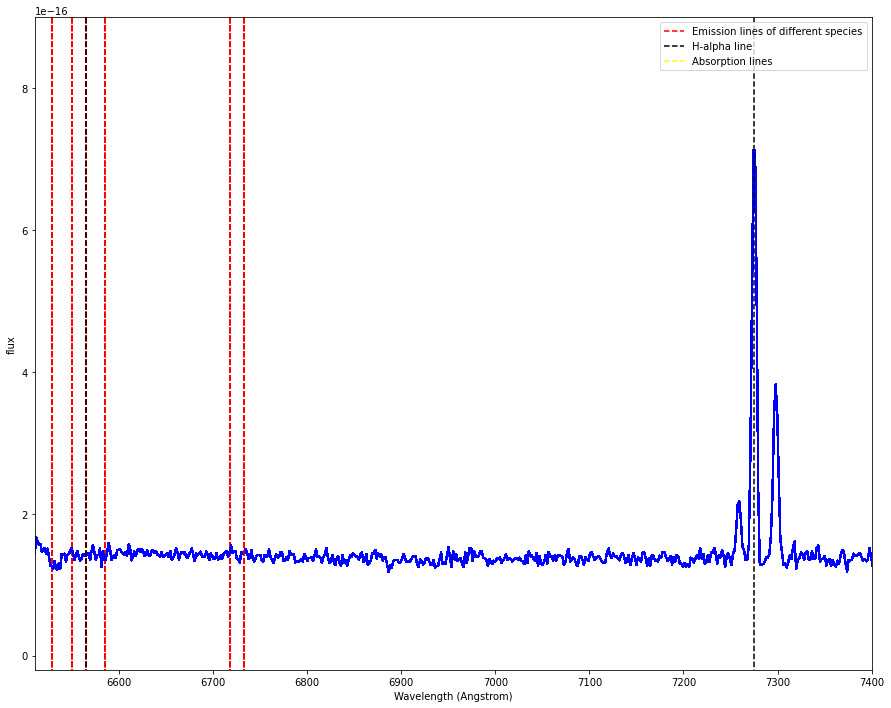

0.10824557742196417


In [ ]:
A = fits.open('Galaxy-D.fits')
data = A[1].data

flux = A[1].data['flux']
wavelength = A[1].data['loglam']

lam = 10**(wavelength)
Flux = flux*10**-17
plt.figure(figsize=(15,12))
for i in lam1:
  for t in lam2:

    plt.plot(lam, Flux,color ='blue')
    y=plt.vlines(i,-5*10**-17,38*10**-16,linestyle = '--',color ='red')
    a= plt.vlines(t,-5*10**-17,38*10**-16,linestyle = '--',color ='yellow')
    plt.ylim(-2*10**-17,9*10**-16)
    plt.xlim(6510,7400)
    plt.xlabel('Wavelength (Angstrom)')
    plt.ylabel('flux')

x=plt.vlines(6564.61,-5*10**-17,38*10**-16,linestyle='--',color='black',label = 'H-alpha line')
plt.legend(handles=[y,x,a],labels = ['Emission lines of different species','H-alpha line','Absorption lines'])
plt.vlines(7275.2,-5*10**-17,38*10**-16,linestyle='--',color='black')
#plt.vlines(6723,-5*10**-17,38*10**-16,linestyle='--',color='black')
plt.show()

z3=redshift(6564.61,7275.2)
print(z3)

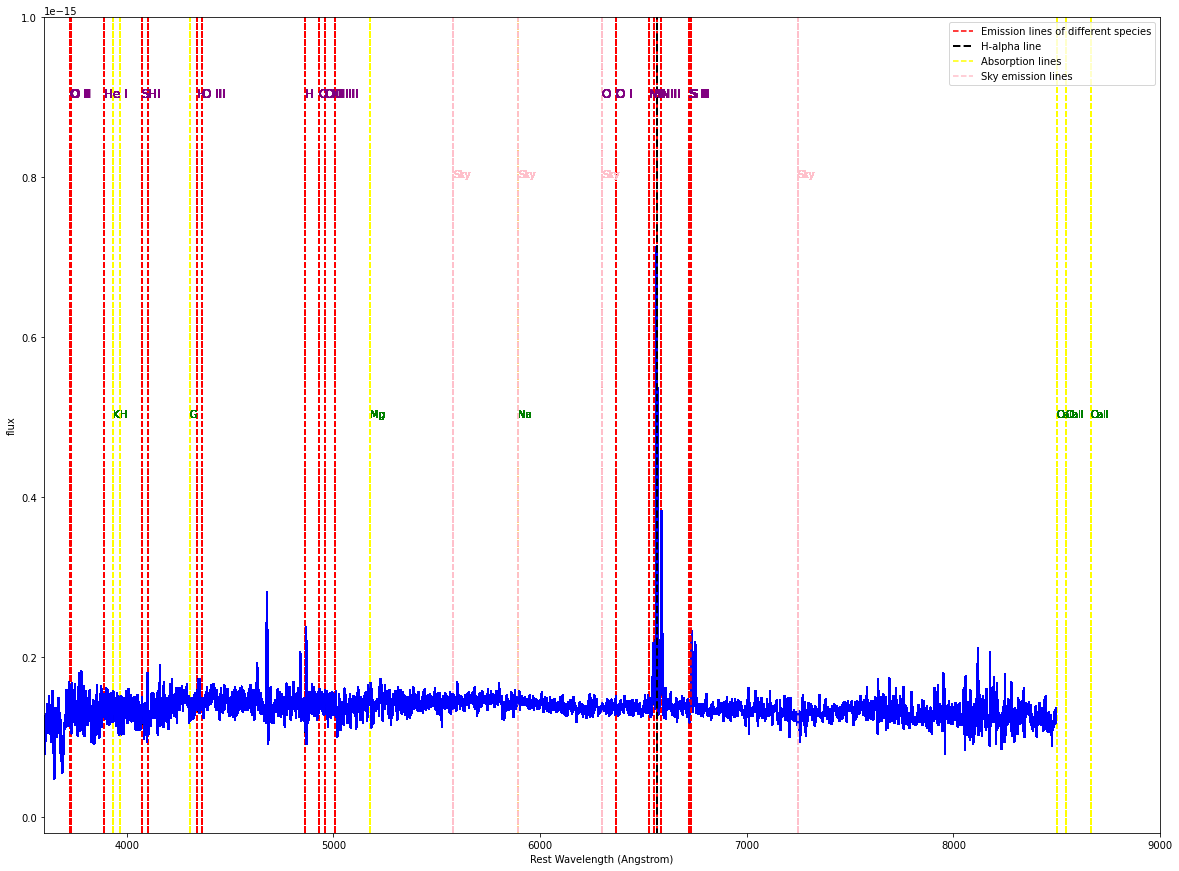

In [ ]:
l4 = lam - (7275.2-6564.61)
plt.figure(figsize=(20,15))
for i in range(len(lam1)):
  for t in range(len(lam2)):
    for s in range(len(lam3)):

      plt.plot(l4, Flux,color ='blue')
      #plt.vlines(lam1[i],-8*10**-17,15*10**-16,linestyle = '--',color ='black')
      y=plt.vlines(lam1[i],-8*10**-17,38*10**-16,linestyle = '--',color ='red')
      a=plt.vlines(lam2[t],-8*10**-17,38*10**-16,linestyle = '--',color = 'yellow')
      k=plt.vlines(lam3[s],-8*10**-17,38*10**-16,linestyle = '--',color = 'pink')

      plt.xlim(3600,9000)
      text =plt.text(lam1[i],9*10**-16,species[i],color='purple',fontsize = '12')
      if text.get_position()[0] < 3600 :
        text.set_visible(False)
      text1 = plt.text(lam2[t],5*10**-16,species2[t],color='green')
      if text1.get_position()[0] < 3600 :
        text.set_visible(False)
      text2 = plt.text(lam3[s],8*10**-16,species3[s],color ='pink')
      if text2.get_position()[0] < 3600 :
        text.set_visible(False)
      plt.ylim(-2*10**-17,10*10**-16)

      plt.xlabel('Rest Wavelength (Angstrom)')
      plt.ylabel('flux')

x=plt.vlines(6564.61,-5*10**-17,15*10**-16,linestyle='--',color='black',label = 'H-alpha line',linewidth = 2)
#plt.vlines(6729,-5*10**-17,15*10**-16,linestyle='--',color='black')

plt.legend(handles=[y,x,a,k],labels = ['Emission lines of different species','H-alpha line','Absorption lines','Sky emission lines'])
plt.show()

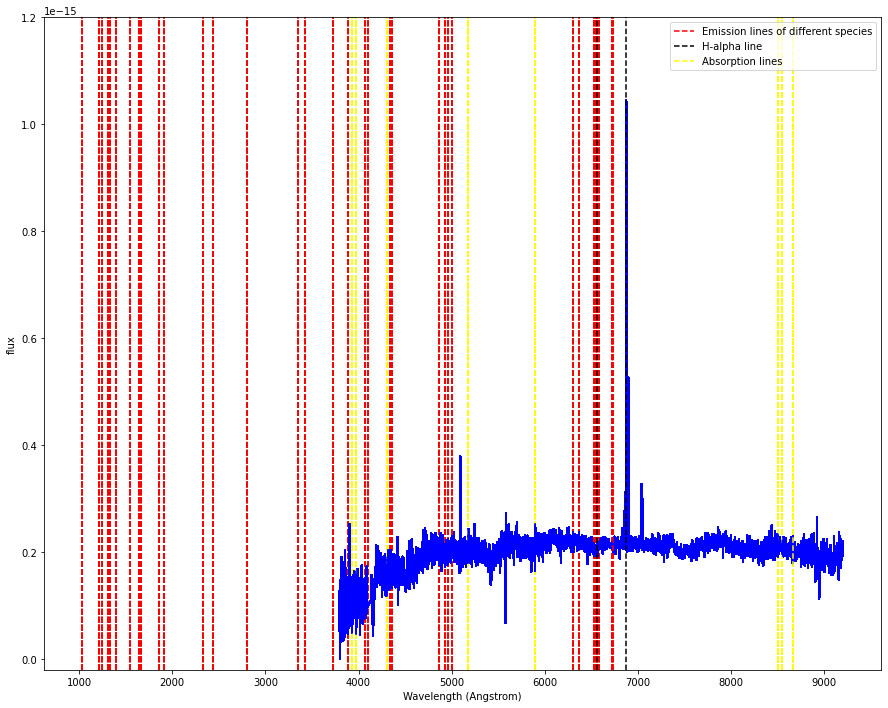

0.04712998944339425


In [ ]:
A = fits.open('Galaxy-E.fits')
data = A[1].data

flux = A[1].data['flux']
wavelength = A[1].data['loglam']

lam = 10**(wavelength)
Flux = flux*10**-17
plt.figure(figsize=(15,12))
for i in lam1:
  for t in lam2:

    plt.plot(lam, Flux,color ='blue')
    y=plt.vlines(i,-5*10**-17,38*10**-16,linestyle = '--',color ='red')
    a=plt.vlines(t,-5*10**-17,38*10**-16,linestyle = '--',color ='yellow')

    plt.ylim(-2*10**-17,12*10**-16)
    #plt.xlim(6510,6950)
    plt.xlabel('Wavelength (Angstrom)')
    plt.ylabel('flux')

x=plt.vlines(6564.61,-5*10**-17,38*10**-16,linestyle='--',color='black',label = 'H-alpha line')
plt.legend(handles=[y,x,a],labels = ['Emission lines of different species','H-alpha line','Absorption lines'])
plt.vlines(6874,-5*10**-17,38*10**-16,linestyle='--',color='black')
#plt.vlines(6723,-5*10**-17,38*10**-16,linestyle='--',color='black')
plt.show()

z4=redshift(6564.61,6874)
print(z4)

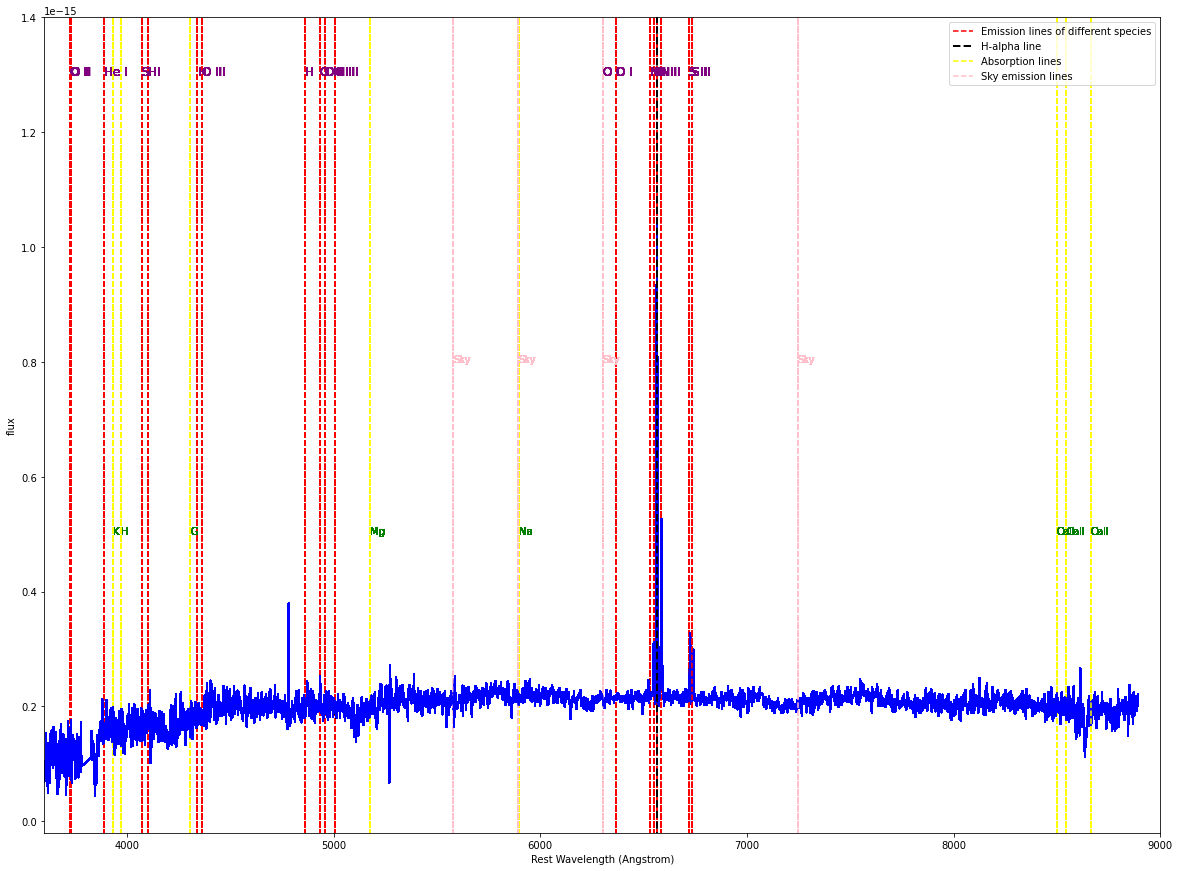

In [ ]:
l5 = lam -(6874-6564.61)
plt.figure(figsize=(20,15))
for i in range(len(lam1)):
  for t in range(len(lam2)):
    for s in range(len(lam3)):

      plt.plot(l5, Flux,color ='blue')
      #plt.vlines(lam1[i],-8*10**-17,15*10**-16,linestyle = '--',color ='black')
      y=plt.vlines(lam1[i],-8*10**-17,38*10**-16,linestyle = '--',color ='red')
      a=plt.vlines(lam2[t],-8*10**-17,38*10**-16,linestyle = '--',color = 'yellow')
      k=plt.vlines(lam3[s],-8*10**-17,38*10**-16,linestyle = '--',color = 'pink')

      plt.xlim(3600,9000)
      text =plt.text(lam1[i],13*10**-16,species[i],color='purple',fontsize = '12')
      if text.get_position()[0] < 3600 :
        text.set_visible(False)
      text1 = plt.text(lam2[t],5*10**-16,species2[t],color='green')
      if text1.get_position()[0] < 3600 :
        text.set_visible(False)
      text2 = plt.text(lam3[s],8*10**-16,species3[s],color ='pink')
      if text2.get_position()[0] < 3600 :
        text.set_visible(False)
      plt.ylim(-2*10**-17,14*10**-16)

      plt.xlabel('Rest Wavelength (Angstrom)')
      plt.ylabel('flux')

x=plt.vlines(6564.61,-5*10**-17,15*10**-16,linestyle='--',color='black',label = 'H-alpha line',linewidth = 2)
#plt.vlines(6729,-5*10**-17,15*10**-16,linestyle='--',color='black')

plt.legend(handles=[y,x,a,k],labels = ['Emission lines of different species','H-alpha line','Absorption lines','Sky emission lines'])
plt.show()

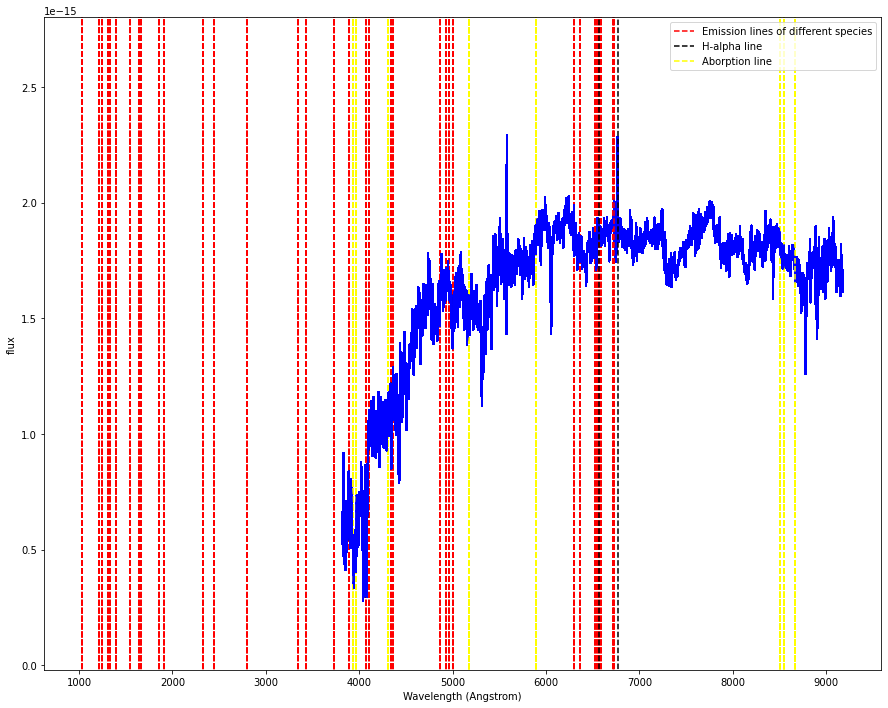

0.030678136248764257


In [ ]:
A = fits.open('Galaxy-F.fits')
data = A[1].data

flux = A[1].data['flux']
wavelength = A[1].data['loglam']

lam = 10**(wavelength)
Flux = flux*10**-17
plt.figure(figsize=(15,12))
for i in lam1:
  for t in lam2:


    plt.plot(lam, Flux,color ='blue')
    y=plt.vlines(i,-5*10**-17,38*10**-16,linestyle = '--',color ='red')
    a=plt.vlines(t,-5*10**-17,38*10**-16,linestyle = '--',color ='yellow')
    plt.ylim(-2*10**-17,28*10**-16)
    #plt.xlim(6610,6800)
    plt.xlabel('Wavelength (Angstrom)')
    plt.ylabel('flux')

x=plt.vlines(6564.61,-5*10**-17,38*10**-16,linestyle='--',color='black',label = 'H-alpha line')
plt.legend(handles=[y,x,a],labels = ['Emission lines of different species','H-alpha line','Aborption line'])
plt.vlines(6766,-5*10**-17,38*10**-16,linestyle='--',color='black')
#plt.vlines(6723,-5*10**-17,38*10**-16,linestyle='--',color='black')
plt.show()

z5=redshift(6564.61,6766)
print(z5)

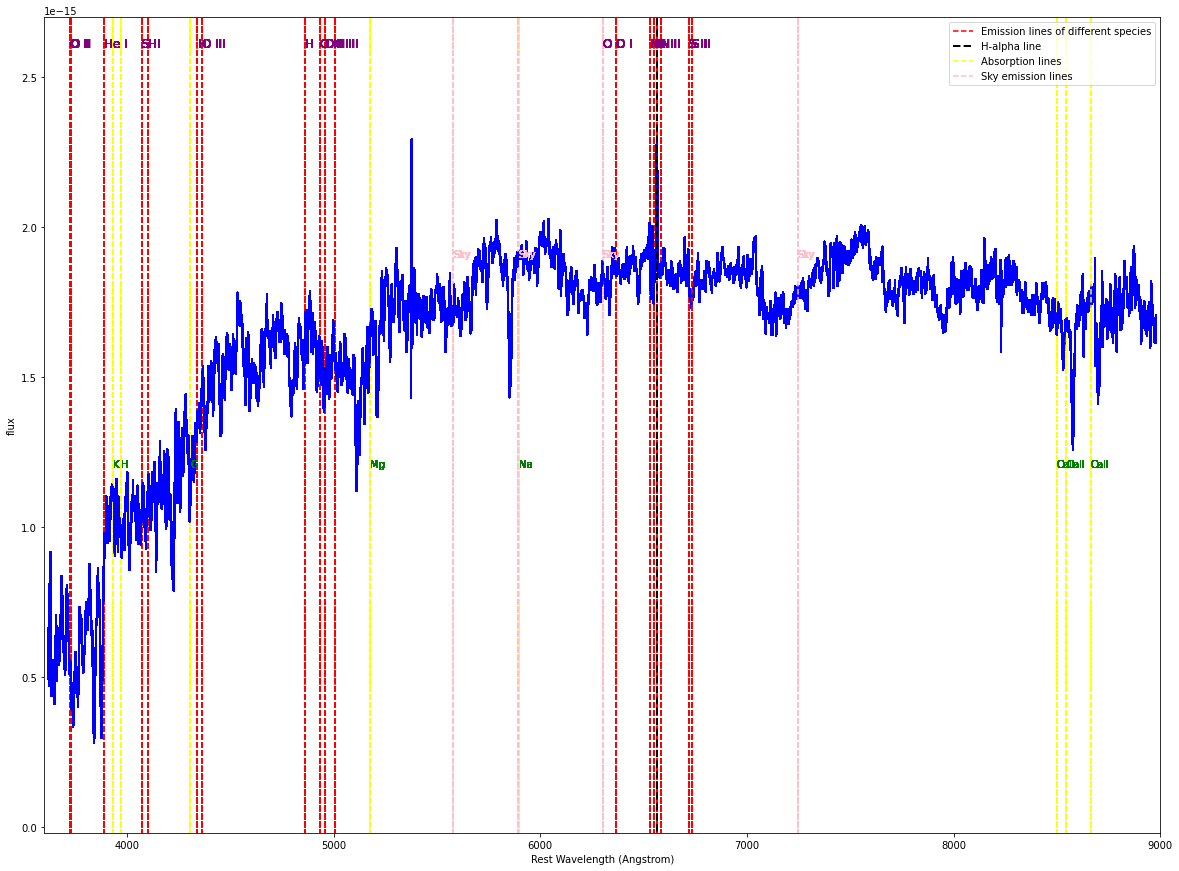

In [ ]:
l6 = lam - (6766-6564.61)
plt.figure(figsize=(20,15))
for i in range(len(lam1)):
  for t in range(len(lam2)):
    for s in range(len(lam3)):

      plt.plot(l6, Flux,color ='blue')
      #plt.vlines(lam1[i],-8*10**-17,15*10**-16,linestyle = '--',color ='black')
      y=plt.vlines(lam1[i],-8*10**-17,38*10**-16,linestyle = '--',color ='red')
      a=plt.vlines(lam2[t],-8*10**-17,38*10**-16,linestyle = '--',color = 'yellow')
      k=plt.vlines(lam3[s],-8*10**-17,38*10**-16,linestyle = '--',color = 'pink')

      plt.xlim(3600,9000)
      text =plt.text(lam1[i],26*10**-16,species[i],color='purple',fontsize = '12')
      if text.get_position()[0] < 3600 :
        text.set_visible(False)
      text1 = plt.text(lam2[t],12*10**-16,species2[t],color='green')
      if text1.get_position()[0] < 3600 :
        text.set_visible(False)
      text2 = plt.text(lam3[s],19*10**-16,species3[s],color ='pink')
      if text2.get_position()[0] < 3600 :
        text.set_visible(False)
      plt.ylim(-2*10**-17,27*10**-16)

      plt.xlabel('Rest Wavelength (Angstrom)')
      plt.ylabel('flux')

x=plt.vlines(6564.61,-5*10**-17,38*10**-16,linestyle='--',color='black',label = 'H-alpha line',linewidth = 2)
#plt.vlines(6729,-5*10**-17,15*10**-16,linestyle='--',color='black')

plt.legend(handles=[y,x,a,k],labels = ['Emission lines of different species','H-alpha line','Absorption lines','Sky emission lines'])
plt.show()

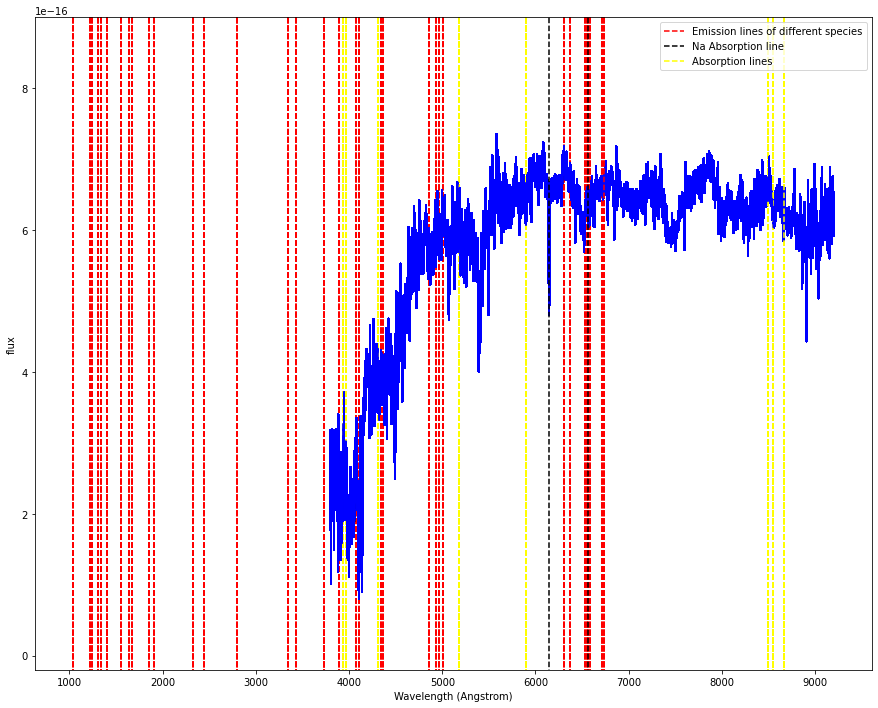

0.04247235226270433


In [ ]:
A = fits.open('Galaxy-G.fits')
data = A[1].data

flux = A[1].data['flux']
wavelength = A[1].data['loglam']

lam = 10**(wavelength)
Flux = flux*10**-17
plt.figure(figsize=(15,12))
for i in lam1:
  for t in lam2:


    plt.plot(lam, Flux,color ='blue')
    y=plt.vlines(i,-5*10**-17,38*10**-16,linestyle = '--',color ='red')
    a=plt.vlines(t,-5*10**-17,38*10**-16,linestyle = '--',color ='yellow')
    plt.ylim(-2*10**-17,9*10**-16)
    #plt.xlim(5800,6300)
    plt.xlabel('Wavelength (Angstrom)')
    plt.ylabel('flux')

x=plt.vlines(6564.61,-5*10**-17,38*10**-16,linestyle='--',color='black',label = 'Na Absorption line')
plt.legend(handles=[y,x,a],labels = ['Emission lines of different species','Na Absorption line','Absorption lines'])
plt.vlines(6146,-5*10**-17,38*10**-16,linestyle='--',color='black')
#plt.vlines(6723,-5*10**-17,38*10**-16,linestyle='--',color='black')
plt.show()

z6=redshift(5895.6,6146)
print(z6)

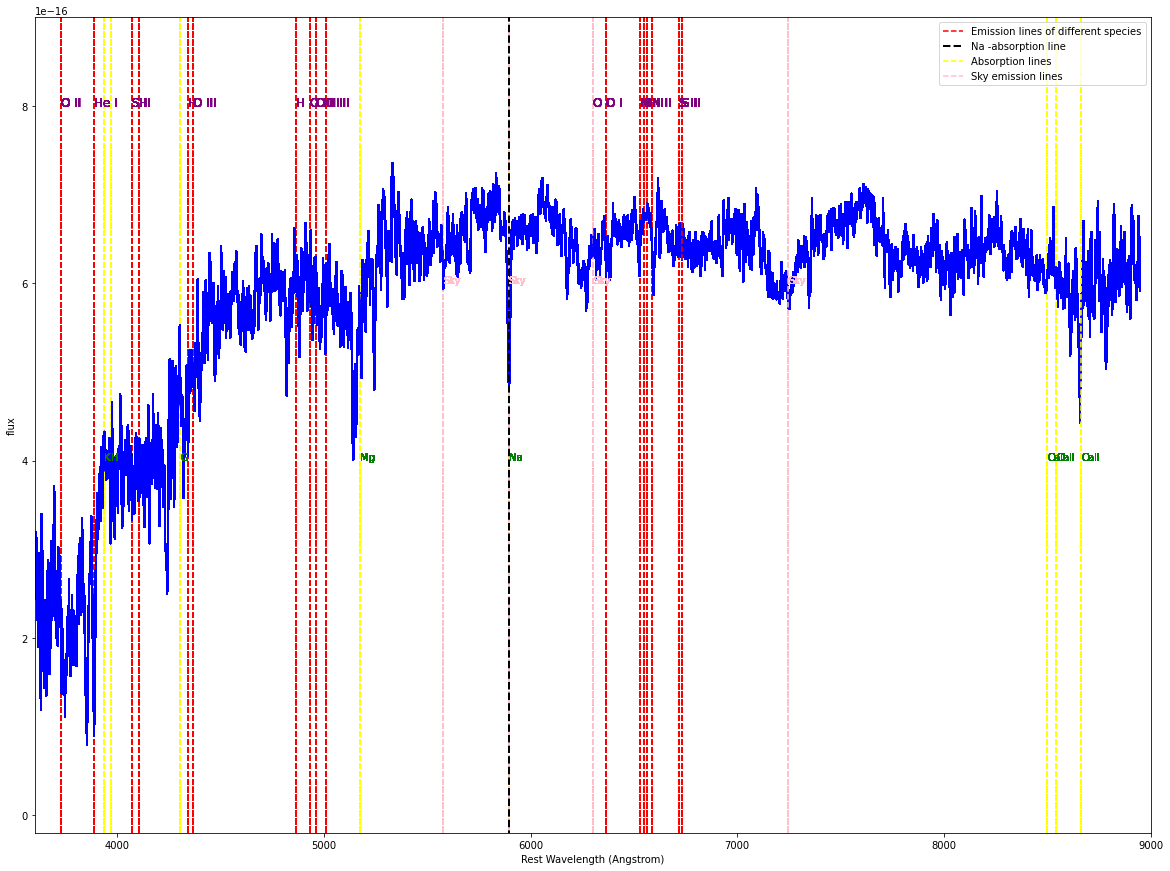

In [ ]:
l7 = lam - (6146 - 5895.6)
plt.figure(figsize=(20,15))
for i in range(len(lam1)):
  for t in range(len(lam2)):
    for s in range(len(lam3)):

      plt.plot(l7, Flux,color ='blue')
      #plt.vlines(lam1[i],-8*10**-17,15*10**-16,linestyle = '--',color ='black')
      y=plt.vlines(lam1[i],-8*10**-17,38*10**-16,linestyle = '--',color ='red')
      a=plt.vlines(lam2[t],-8*10**-17,38*10**-16,linestyle = '--',color = 'yellow')
      k=plt.vlines(lam3[s],-8*10**-17,38*10**-16,linestyle = '--',color = 'pink')

      plt.xlim(3600,9000)
      text =plt.text(lam1[i],8*10**-16,species[i],color='purple',fontsize = '12')
      if text.get_position()[0] < 3600 :
        text.set_visible(False)
      text1 = plt.text(lam2[t],4*10**-16,species2[t],color='green')
      if text1.get_position()[0] < 3600 :
        text.set_visible(False)
      text2 = plt.text(lam3[s],6*10**-16,species3[s],color ='pink')
      if text2.get_position()[0] < 3600 :
        text.set_visible(False)
      plt.ylim(-2*10**-17,9*10**-16)

      plt.xlabel('Rest Wavelength (Angstrom)')
      plt.ylabel('flux')

x=plt.vlines(5895.6,-5*10**-17,15*10**-16,linestyle='--',color='black',label = 'H-alpha line',linewidth = 2)
#plt.vlines(6729,-5*10**-17,15*10**-16,linestyle='--',color='black')

plt.legend(handles=[y,x,a,k],labels = ['Emission lines of different species','Na -absorption line','Absorption lines','Sky emission lines'])
plt.show()

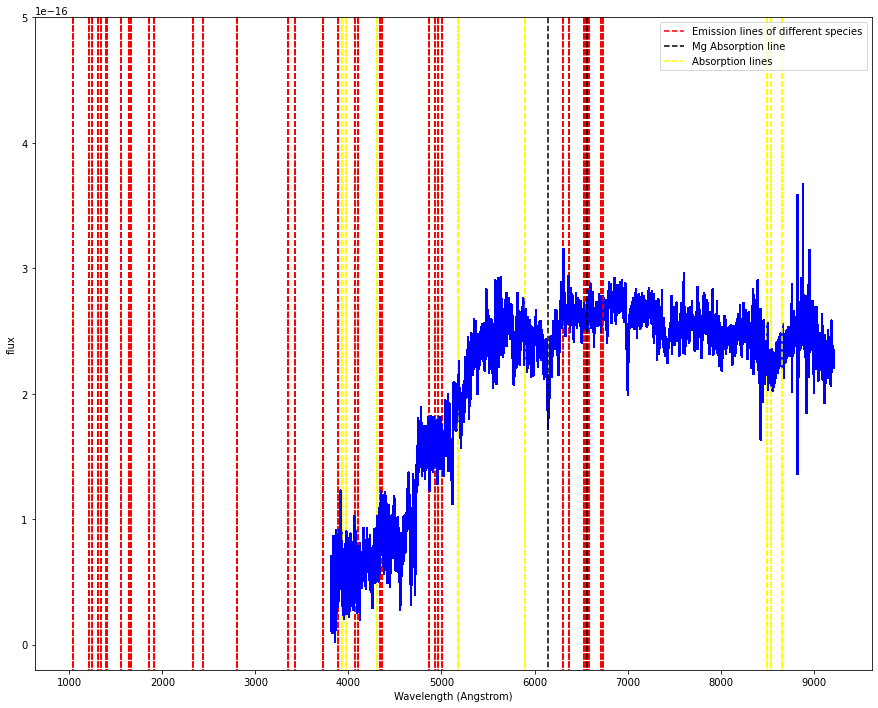

0.18762918461568184


In [ ]:
A = fits.open('Galaxy-H.fits')
data = A[1].data

flux = A[1].data['flux']
wavelength = A[1].data['loglam']

lam = 10**(wavelength)
Flux = flux*10**-17
plt.figure(figsize=(15,12))
for i in lam1:
  for t in lam2:

    plt.plot(lam, Flux,color ='blue')
    y=plt.vlines(i,-5*10**-17,38*10**-16,linestyle = '--',color ='red')
    a=plt.vlines(t,-5*10**-17,38*10**-16,linestyle = '--',color ='yellow')
    plt.ylim(-2*10**-17,5*10**-16)
    #plt.xlim(4800,6500)
    plt.xlabel('Wavelength (Angstrom)')
    plt.ylabel('flux')

x=plt.vlines(6564.61,-5*10**-17,38*10**-16,linestyle='--',color='black',label = 'Mg Absorption line')
plt.legend(handles=[y,x,a],labels = ['Emission lines of different species','Mg Absorption line','Absorption lines'])
plt.vlines(6148,-5*10**-17,38*10**-16,linestyle='--',color='black')
#plt.vlines(6723,-5*10**-17,38*10**-16,linestyle='--',color='black')
plt.show()

z7=redshift(5176.7,6148)
print(z7)

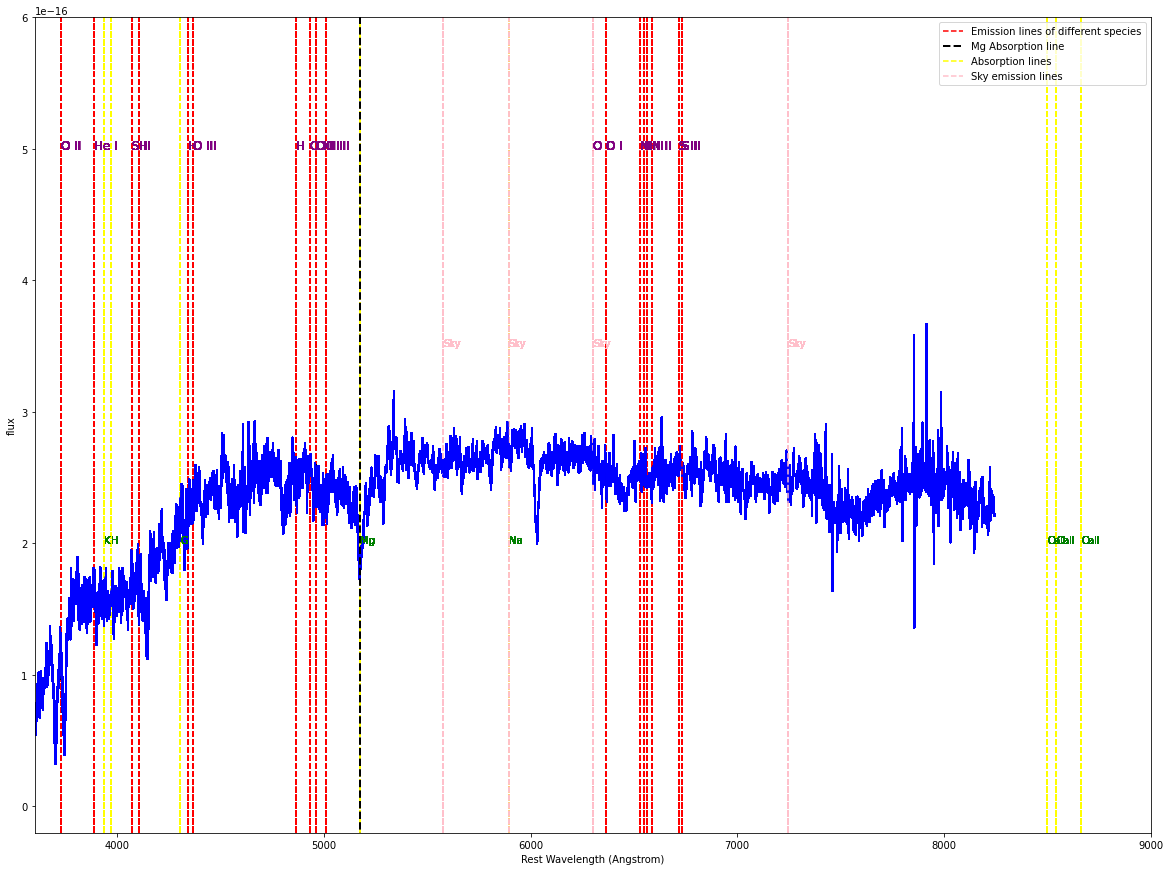

In [ ]:
l8 = lam - (6148 - 5176.7 )
plt.figure(figsize=(20,15))
for i in range(len(lam1)):
  for t in range(len(lam2)):
    for s in range(len(lam3)):

      plt.plot(l8, Flux,color ='blue')
      #plt.vlines(lam1[i],-8*10**-17,15*10**-16,linestyle = '--',color ='black')
      y=plt.vlines(lam1[i],-8*10**-17,38*10**-16,linestyle = '--',color ='red')
      a=plt.vlines(lam2[t],-8*10**-17,38*10**-16,linestyle = '--',color = 'yellow')
      k=plt.vlines(lam3[s],-8*10**-17,38*10**-16,linestyle = '--',color = 'pink')

      plt.xlim(3600,9000)
      text =plt.text(lam1[i],5*10**-16,species[i],color='purple',fontsize = '12')
      if text.get_position()[0] < 3600 :
        text.set_visible(False)
      text1 = plt.text(lam2[t],2*10**-16,species2[t],color='green')
      if text1.get_position()[0] < 3600 :
        text.set_visible(False)
      text2 = plt.text(lam3[s],3.5*10**-16,species3[s],color ='pink')
      if text2.get_position()[0] < 3600 :
        text.set_visible(False)
      plt.ylim(-2*10**-17,6*10**-16)

      plt.xlabel('Rest Wavelength (Angstrom)')
      plt.ylabel('flux')

x=plt.vlines(5176.7,-5*10**-17,15*10**-16,linestyle='--',color='black',label = 'H-alpha line',linewidth = 2)
#plt.vlines(6729,-5*10**-17,15*10**-16,linestyle='--',color='black')

plt.legend(handles=[y,x,a,k],labels = ['Emission lines of different species','Mg Absorption line','Absorption lines','Sky emission lines'])
plt.show()

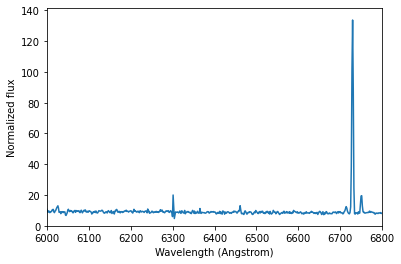

In [ ]:
plt.plot(lam, flux)
plt.ylim(0, )
plt.xlim(6000,6800)
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Normalized flux')
plt.show()
A.close()

In [ ]:
pip install specutils


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.5/194.5 KB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 KB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 414.4/414.4 KB 20.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.1/108.1 KB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 68.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.8/71.8 KB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.6/195.6 KB 15.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.6/69.6 KB 7.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.

[ 7.379534   9.257522   5.862353  ... -0.5780168 -1.6113502 -0.7126707]


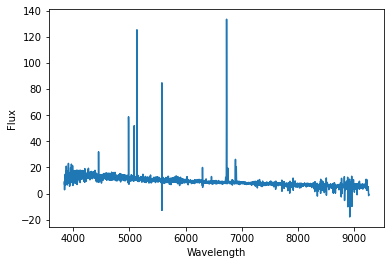

In [ ]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
from specutils import Spectrum1D, SpectralRegion
from specutils.fitting import find_lines_threshold, find_lines_derivative
from astropy.units import Quantity,Unit

# Open the FITS file
hdul = fits.open('Galaxy-A.fits')

# Extract the spectrum data from the FITS file
data = hdul[1].data
wavelength = data['loglam']
flux = data['flux']
print(flux)
# Convert flux to the appropriate units
Flux = Quantity(flux, unit='1e-17 erg / (Angstrom cm2 s)')

# Convert wavelength to the appropriate units
Wavelength = Quantity(10**wavelength, unit='Angstrom')

spectrum = Spectrum1D(flux=Flux, spectral_axis=Wavelength)

# Plot the spectrum
plt.plot(spectrum.spectral_axis, spectrum.flux)
plt.xlabel('Wavelength')
plt.ylabel('Flux')
plt.show()

# # Close the FITS file
# hdul.close()

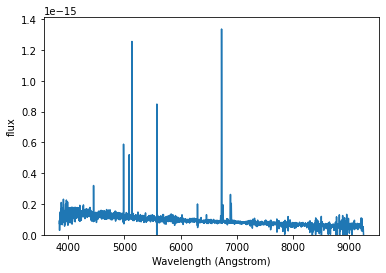

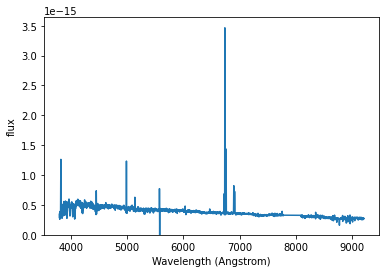

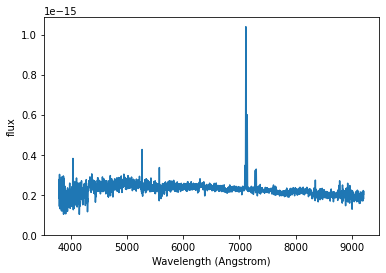

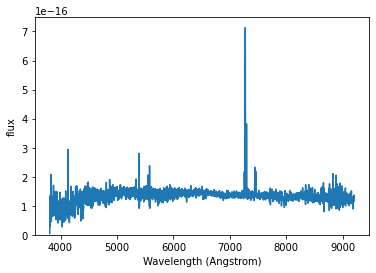

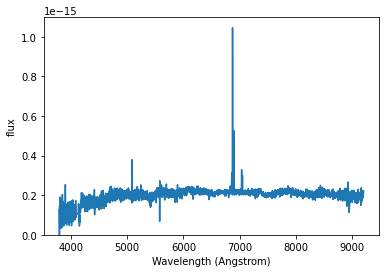

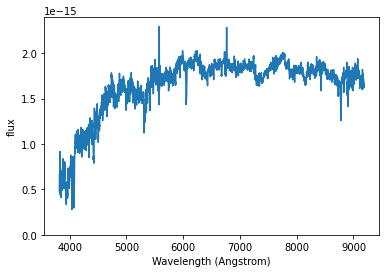

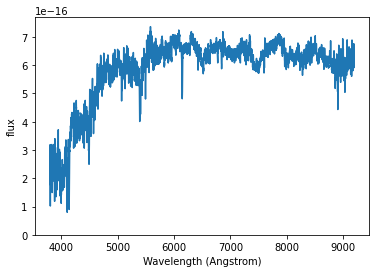

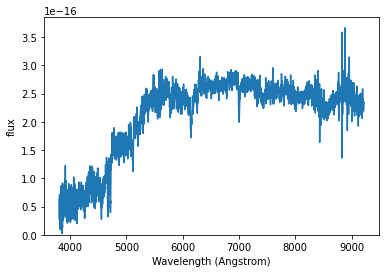

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits
from astropy.wcs import WCS

Files = ['Galaxy-A.fits','Galaxy-B.fits','Galaxy-C.fits','Galaxy-D.fits','Galaxy-E.fits','Galaxy-F.fits','Galaxy-G.fits','Galaxy-H.fits']
for i in Files:
  A = fits.open(i)
  data = A[1].data
  h1 = A[1].header

  flux = A[1].data['flux']
  wavelength = A[1].data['loglam']
  # w = WCS(h1, naxis=1, relax=False, fix=False)
  #lam = w.wcs_pix2world(np.arange(len(flux)), 0)[0]
  lam = 10**(wavelength)
  Flux = flux*10**-17

  plt.plot(lam, Flux)
  plt.ylim(0, )

  plt.xlabel('Wavelength (Angstrom)')
  plt.ylabel('flux')
  plt.show()

  A.close()



In [ ]:
pip install specutils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


 [astropy.modeling.fitting]



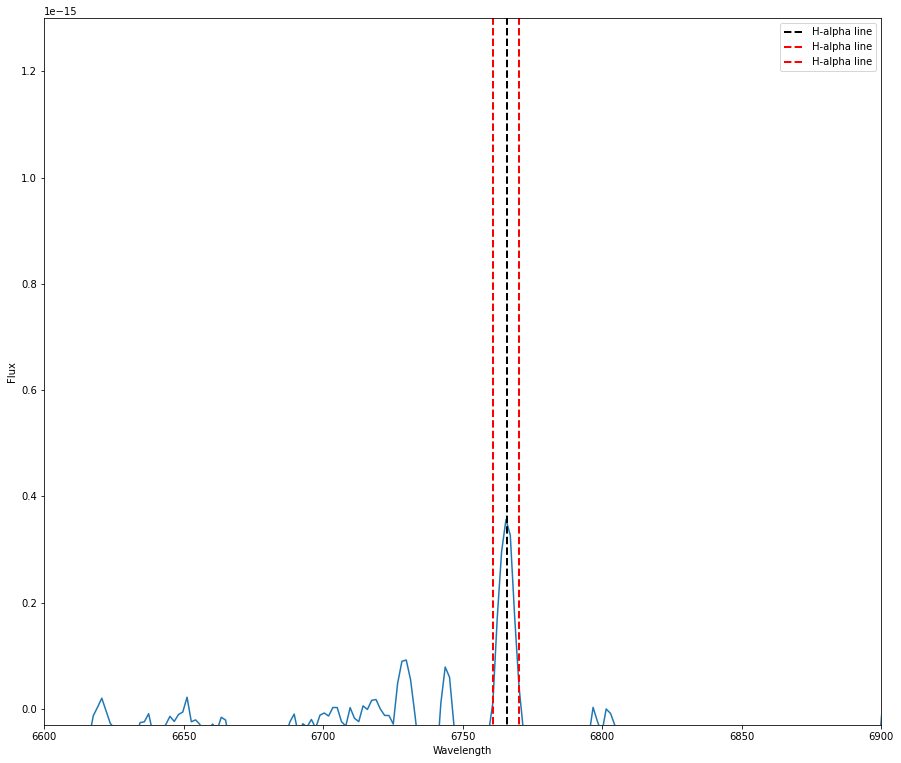

In [ ]:
from specutils import Spectrum1D, SpectralRegion
from astropy.io import fits
from astropy.modeling import models, fitting
from specutils.manipulation import extract_region
from scipy import integrate
from specutils.analysis import line_flux

A = fits.open('Galaxy-F.fits')
data = A[1].data
flux = A[1].data['flux']
wavelength = A[1].data['loglam']
Flux = flux*10**-17
lam = 10**(wavelength)

continuum_model = models.Polynomial1D(degree=3)
fitter = fitting.LinearLSQFitter()
continuum = fitter(continuum_model, lam, Flux)

continuum_subtracted_flux = Flux - continuum(lam)
plt.figure(figsize =(15,13))
plt.plot(lam,continuum_subtracted_flux)
plt.xlabel('Wavelength')
plt.ylabel('Flux')
plt.xlim(6600,6900)
plt.vlines(6766,-5*10**-17,15*10**-16,linestyle='--',color='black',label = 'H-alpha line',linewidth = 2)
plt.vlines(6761,-5*10**-17,15*10**-16,linestyle='--',color='red',label = 'H-alpha line',linewidth = 2)
plt.vlines(6770,-5*10**-17,15*10**-16,linestyle='--',color='red',label = 'H-alpha line',linewidth = 2)

plt.ylim(-0.3*10**-16,13*10**-16)
plt.legend()


plt.show()

In [ ]:
from astropy import units as u
Flux = continuum_subtracted_flux*1e-7*u.erg/u.s/u.cm**2/u.AA

Wavelength = lam *u.AA

spec = Spectrum1D(flux = Flux,spectral_axis =Wavelength)
region = SpectralRegion(6137*u.AA,6770*u.AA)
#print(Wavelength)
#Integrate the flux over the region to get the line flux
lineflux = line_flux(spec, regions=region)

# Print the line flux
print(lineflux)

2.0622815965137848e-22 erg / (cm2 s)
